# BTC ML Trading Models Comparison

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import sys

# Add the features directory to path - navigate from models/code to features
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'features'))
from trend_indicator_pipeline_pkg import TrendIndicatorPipeline, MomentumIndicatorPipeline, VolatilityIndicatorPipeline, CorrelationIndicatorPipeline, FractalDimensionPipeline

from arcticdb.version_store.helper import ArcticMemoryConfig
from arcticdb import Arctic

from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models, save_model, predict_model, pull, tune_model, finalize_model

In [2]:
# load dataset
df = pd.read_csv("D:\Coding\Crypto_Research\data\BTCUSD_2023-1min_ML.csv")

df = df.dropna()


In [3]:
print(df.head())
df

       Unnamed: 0.1            Timestamp  Unnamed: 0     Open     High  \
50398         50398  2023-02-10 03:16:00       50398  21851.5  21856.5   
50399         50399  2023-02-10 03:17:00       50399  21853.2  21853.2   
50400         50400  2023-02-10 03:18:00       50400  21854.3  21855.1   
50401         50401  2023-02-10 03:19:00       50401  21849.3  21849.9   
50402         50402  2023-02-10 03:20:00       50402  21840.9  21853.0   

           Low    Close    Volume        ema_7d       ema_20d  ...  \
50398  21851.2  21853.3  0.000218  22893.243714  22435.379752  ...   
50399  21851.2  21852.7  0.000121  22893.037277  22435.339289  ...   
50400  21847.1  21849.9  0.000298  22892.830326  22435.298635  ...   
50401  21840.3  21841.1  0.000497  22892.621670  22435.257373  ...   
50402  21840.2  21845.7  0.000385  22892.413968  22435.216433  ...   

       macd_hist_12_26    rsi_14d    bb_mid_20d  bb_upper_20d  bb_lower_20d  \
50398      -314.118075  49.990289  22953.582628  23956.

,Unnamed: 0.1,Timestamp,Unnamed: 0,Open,High,Low,Close,Volume,ema_7d,ema_20d,...,macd_hist_12_26,rsi_14d,bb_mid_20d,bb_upper_20d,bb_lower_20d,atr_14d,fd_14d,future_close,future_return,future_trend
50398,50398,2023-02-10 03:16:00,50398,21851.5,21856.5,21851.2,21853.3,0.000218,22893.243714,22435.379752,...,-314.118075,49.990289,22953.582628,23956.433515,21950.731741,11.869257,268.810,22067.6,0.009806,0
50399,50399,2023-02-10 03:17:00,50399,21853.2,21853.2,21851.2,21852.7,0.000121,22893.037277,22435.339289,...,-314.177222,49.990082,22953.610139,23956.296743,21950.923535,11.868773,268.788,22063.4,0.009642,0
50400,50400,2023-02-10 03:18:00,50400,21854.3,21855.1,21847.1,21849.9,0.000298,22892.830326,22435.298635,...,-314.236521,49.989119,22953.637677,23956.159451,21951.115903,11.868581,268.716,22066.1,0.009895,0
50401,50401,2023-02-10 03:19:00,50401,21849.3,21849.9,21840.3,21841.1,0.000497,22892.621670,22435.257373,...,-314.296345,49.986091,22953.665097,23956.021941,21951.308253,11.868468,268.735,22066.4,0.010315,0
50402,50402,2023-02-10 03:20:00,50402,21840.9,21853.0,21840.2,21845.7,0.000385,22892.413968,22435.216433,...,-314.355861,49.987674,22953.692740,23955.883441,21951.502039,11.868515,268.788,22065.9,0.010080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477435,477435,2023-12-26 08:52:00,477435,42713.7,42713.7,42673.9,42673.9,0.000006,43236.335320,42220.375752,...,-129.358930,50.195507,42839.103142,44760.583892,40917.622393,24.245322,177.714,42429.2,-0.005734,0
477436,477436,2023-12-26 08:53:00,477436,42673.9,42673.9,42660.4,42670.3,0.000045,43236.223023,42220.406995,...,-129.418611,50.194924,42839.141597,44760.564502,40917.718692,24.244789,177.730,42428.5,-0.005667,0
477437,477437,2023-12-26 08:54:00,477437,42671.0,42675.0,42671.0,42675.0,0.000010,43236.111680,42220.438563,...,-129.477984,50.195679,42839.180219,44760.545209,40917.815229,24.243820,177.705,42422.6,-0.005914,0
477438,477438,2023-12-26 08:55:00,477438,42675.0,42681.2,42664.9,42664.9,0.000011,43235.998356,42220.469427,...,-129.537972,50.194044,42839.219028,44760.524782,40917.913273,24.243426,177.683,42433.2,-0.005431,0


In [4]:
# classification model setup
clf_setup = setup(
    data=df,
    target='future_trend',
    session_id=42,
    train_size=0.7,
    fold_shuffle=True,
    fold=12,
    verbose=False,
    ignore_features=['Unnamed: 0.1', 'Timestamp', 'Unnamed: 0', 'future_close', 'future_return']
)


In [5]:
top_models = compare_models(n_select=5)

results = pull()
print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9976,0.9997,0.9949,0.9958,0.9954,0.9938,0.9938,8.8783
et,Extra Trees Classifier,0.9976,0.9997,0.9951,0.9955,0.9953,0.9937,0.9937,2.0175
dt,Decision Tree Classifier,0.9965,0.9953,0.9930,0.9932,0.9931,0.9907,0.9907,0.8192
knn,K Neighbors Classifier,0.9947,0.9985,0.9894,0.9900,0.9897,0.9861,0.9861,4.2758
lightgbm,Light Gradient Boosting Machine,0.9924,0.9995,0.9839,0.9863,0.9851,0.9800,0.9800,0.5483
gbc,Gradient Boosting Classifier,0.9687,0.9952,0.8877,0.9887,0.9355,0.9149,0.9172,19.6950
ada,Ada Boost Classifier,0.9329,0.9744,0.7744,0.9546,0.8551,0.8121,0.8196,4.0692
ridge,Ridge Classifier,0.7502,0.6750,0.0346,0.7311,0.0660,0.0440,0.1206,0.0925
lr,Logistic Regression,0.7457,0.6766,0.0514,0.5124,0.0932,0.0500,0.0962,3.4633
dummy,Dummy Classifier,0.7446,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0517


                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9976  0.9997  0.9949  0.9958   
et                 Extra Trees Classifier    0.9976  0.9997  0.9951  0.9955   
dt               Decision Tree Classifier    0.9965  0.9953  0.9930  0.9932   
knn                K Neighbors Classifier    0.9947  0.9985  0.9894  0.9900   
lightgbm  Light Gradient Boosting Machine    0.9924  0.9995  0.9839  0.9863   
gbc          Gradient Boosting Classifier    0.9687  0.9952  0.8877  0.9887   
ada                  Ada Boost Classifier    0.9329  0.9744  0.7744  0.9546   
ridge                    Ridge Classifier    0.7502  0.6750  0.0346  0.7311   
lr                    Logistic Regression    0.7457  0.6766  0.0514  0.5124   
dummy                    Dummy Classifier    0.7446  0.5000  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.7445  0.6597  0.0005  0.3719   
nb                            Naive Bayes    0.6897 

In [6]:
# Example: tune top 5 models
tuned_models = [tune_model(m) for m in top_models]

# Finalize (retrain on entire dataset)
final_models = [finalize_model(m) for m in tuned_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.9986,0.9101,0.9964,0.9513,0.9356,0.9373
1,0.9765,0.9989,0.9106,0.9971,0.9519,0.9363,0.9380
2,0.9762,0.9987,0.9099,0.9967,0.9514,0.9357,0.9374
3,0.9758,0.9987,0.9088,0.9959,0.9504,0.9344,0.9361
4,0.9780,0.9986,0.9180,0.9957,0.9553,0.9408,0.9421
5,0.9785,0.9989,0.9191,0.9964,0.9562,0.9420,0.9433
6,0.9772,0.9987,0.9132,0.9974,0.9535,0.9385,0.9401
7,0.9788,0.9989,0.9216,0.9949,0.9568,0.9428,0.9440
8,0.9750,0.9984,0.9043,0.9976,0.9486,0.9322,0.9341


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9550,0.9943,0.8273,0.9958,0.9038,0.8747,0.8811
1,0.9513,0.9948,0.8123,0.9963,0.8950,0.8637,0.8713
2,0.9514,0.9951,0.8131,0.9960,0.8953,0.8641,0.8716
3,0.9542,0.9950,0.8249,0.9947,0.9019,0.8723,0.8788
4,0.9515,0.9941,0.8130,0.9965,0.8954,0.8643,0.8719
5,0.9524,0.9946,0.8168,0.9962,0.8976,0.8670,0.8742
6,0.9487,0.9940,0.8026,0.9955,0.8887,0.8558,0.8642
7,0.9532,0.9955,0.8199,0.9962,0.8995,0.8694,0.8764
8,0.9517,0.9943,0.8141,0.9963,0.8960,0.8650,0.8725


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9904,0.9956,0.9767,0.9857,0.9812,0.9748,0.9748
1,0.9913,0.9959,0.9789,0.9870,0.9830,0.9771,0.9772
2,0.9911,0.9975,0.9819,0.9833,0.9826,0.9767,0.9767
3,0.9917,0.9969,0.9822,0.9853,0.9838,0.9782,0.9782
4,0.9912,0.9965,0.9821,0.9836,0.9829,0.9770,0.9770
5,0.9910,0.9966,0.9778,0.9870,0.9824,0.9764,0.9764
6,0.9910,0.9963,0.9804,0.9842,0.9823,0.9762,0.9762
7,0.9909,0.9972,0.9822,0.9822,0.9822,0.9761,0.9761
8,0.9913,0.9974,0.9769,0.9890,0.9829,0.9771,0.9771


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9950,0.9994,0.9890,0.9913,0.9902,0.9868,0.9868
1,0.9957,0.9993,0.9903,0.9929,0.9916,0.9887,0.9887
2,0.9959,0.9995,0.9896,0.9943,0.9920,0.9892,0.9892
3,0.9957,0.9992,0.9898,0.9935,0.9917,0.9888,0.9888
4,0.9958,0.9992,0.9890,0.9946,0.9918,0.9890,0.9890
5,0.9954,0.9996,0.9885,0.9935,0.9910,0.9879,0.9880
6,0.9961,0.9996,0.9918,0.9931,0.9925,0.9899,0.9899
7,0.9958,0.9995,0.9896,0.9940,0.9918,0.9890,0.9890
8,0.9954,0.9994,0.9881,0.9938,0.9909,0.9878,0.9878


Fitting 12 folds for each of 10 candidates, totalling 120 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9950,0.9999,0.9904,0.9899,0.9902,0.9868,0.9868
1,0.9953,0.9998,0.9909,0.9907,0.9908,0.9877,0.9877
2,0.9953,0.9999,0.9898,0.9917,0.9907,0.9875,0.9875
3,0.9944,0.9999,0.9895,0.9887,0.9891,0.9853,0.9853
4,0.9961,0.9999,0.9925,0.9921,0.9923,0.9897,0.9897
5,0.9951,0.9998,0.9898,0.9910,0.9904,0.9871,0.9871
6,0.9953,0.9999,0.9926,0.9892,0.9909,0.9878,0.9878
7,0.9960,0.9999,0.9914,0.9929,0.9921,0.9894,0.9894
8,0.9946,0.9996,0.9881,0.9907,0.9894,0.9857,0.9857


Fitting 12 folds for each of 10 candidates, totalling 120 fits


In [7]:
# Run predictions on hold-out test set
for model in top_models:
    print(model)
    pred = predict_model(model)
    print(pred.head())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9978,0.9998,0.9951,0.9963,0.9957,0.9943,0.9943


                Open          High           Low         Close    Volume  \
203636  27248.400391  27261.000000  27246.699219  27247.199219  0.001548   
124765  28192.099609  28204.400391  28192.099609  28204.199219  0.000772   
104028  27856.699219  27882.199219  27828.000000  27832.599609  0.004641   
400979  34277.398438  34295.199219  34277.398438  34295.199219  0.000109   
362102  27251.800781  27262.699219  27240.800781  27246.900391  0.000684   

              ema_7d       ema_20d       ema_30d        sma_7d       sma_20d  \
203636  27113.683594  27229.417969  27370.933594  27217.537109  26978.500000   
124765  28020.646484  27105.750000  26367.845703  28112.335938  27510.529297   
104028  26130.492188  24331.580078  23820.697266  26144.292969  23496.232422   
400979  33612.746094  31326.005859  30324.343750  34195.015625  30375.283203   
362102  27172.125000  26806.048828  26797.648438  27053.117188  26743.332031   

        ...  macd_hist_12_26    rsi_14d    bb_mid_20d  bb_uppe

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9977,0.9999,0.9950,0.9960,0.9955,0.9939,0.9939


                Open          High           Low         Close    Volume  \
203636  27248.400391  27261.000000  27246.699219  27247.199219  0.001548   
124765  28192.099609  28204.400391  28192.099609  28204.199219  0.000772   
104028  27856.699219  27882.199219  27828.000000  27832.599609  0.004641   
400979  34277.398438  34295.199219  34277.398438  34295.199219  0.000109   
362102  27251.800781  27262.699219  27240.800781  27246.900391  0.000684   

              ema_7d       ema_20d       ema_30d        sma_7d       sma_20d  \
203636  27113.683594  27229.417969  27370.933594  27217.537109  26978.500000   
124765  28020.646484  27105.750000  26367.845703  28112.335938  27510.529297   
104028  26130.492188  24331.580078  23820.697266  26144.292969  23496.232422   
400979  33612.746094  31326.005859  30324.343750  34195.015625  30375.283203   
362102  27172.125000  26806.048828  26797.648438  27053.117188  26743.332031   

        ...  macd_hist_12_26    rsi_14d    bb_mid_20d  bb_uppe

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9966,0.9954,0.9929,0.9939,0.9934,0.9912,0.9912


                Open          High           Low         Close    Volume  \
203636  27248.400391  27261.000000  27246.699219  27247.199219  0.001548   
124765  28192.099609  28204.400391  28192.099609  28204.199219  0.000772   
104028  27856.699219  27882.199219  27828.000000  27832.599609  0.004641   
400979  34277.398438  34295.199219  34277.398438  34295.199219  0.000109   
362102  27251.800781  27262.699219  27240.800781  27246.900391  0.000684   

              ema_7d       ema_20d       ema_30d        sma_7d       sma_20d  \
203636  27113.683594  27229.417969  27370.933594  27217.537109  26978.500000   
124765  28020.646484  27105.750000  26367.845703  28112.335938  27510.529297   
104028  26130.492188  24331.580078  23820.697266  26144.292969  23496.232422   
400979  33612.746094  31326.005859  30324.343750  34195.015625  30375.283203   
362102  27172.125000  26806.048828  26797.648438  27053.117188  26743.332031   

        ...  macd_hist_12_26    rsi_14d    bb_mid_20d  bb_uppe

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9947,0.9987,0.9890,0.9904,0.9897,0.9862,0.9862


                Open          High           Low         Close    Volume  \
203636  27248.400391  27261.000000  27246.699219  27247.199219  0.001548   
124765  28192.099609  28204.400391  28192.099609  28204.199219  0.000772   
104028  27856.699219  27882.199219  27828.000000  27832.599609  0.004641   
400979  34277.398438  34295.199219  34277.398438  34295.199219  0.000109   
362102  27251.800781  27262.699219  27240.800781  27246.900391  0.000684   

              ema_7d       ema_20d       ema_30d        sma_7d       sma_20d  \
203636  27113.683594  27229.417969  27370.933594  27217.537109  26978.500000   
124765  28020.646484  27105.750000  26367.845703  28112.335938  27510.529297   
104028  26130.492188  24331.580078  23820.697266  26144.292969  23496.232422   
400979  33612.746094  31326.005859  30324.343750  34195.015625  30375.283203   
362102  27172.125000  26806.048828  26797.648438  27053.117188  26743.332031   

        ...  macd_hist_12_26    rsi_14d    bb_mid_20d  bb_uppe

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9926,0.9996,0.9847,0.9864,0.9855,0.9806,0.9806


                Open          High           Low         Close    Volume  \
203636  27248.400391  27261.000000  27246.699219  27247.199219  0.001548   
124765  28192.099609  28204.400391  28192.099609  28204.199219  0.000772   
104028  27856.699219  27882.199219  27828.000000  27832.599609  0.004641   
400979  34277.398438  34295.199219  34277.398438  34295.199219  0.000109   
362102  27251.800781  27262.699219  27240.800781  27246.900391  0.000684   

              ema_7d       ema_20d       ema_30d        sma_7d       sma_20d  \
203636  27113.683594  27229.417969  27370.933594  27217.537109  26978.500000   
124765  28020.646484  27105.750000  26367.845703  28112.335938  27510.529297   
104028  26130.492188  24331.580078  23820.697266  26144.292969  23496.232422   
400979  33612.746094  31326.005859  30324.343750  34195.015625  30375.283203   
362102  27172.125000  26806.048828  26797.648438  27053.117188  26743.332031   

        ...  macd_hist_12_26    rsi_14d    bb_mid_20d  bb_uppe


Backtesting model: RandomForestClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9993,1.0000,0.9985,0.9989,0.9987,0.9983,0.9983


Trade log saved: d:\Coding\Crypto_Research\models\code\trade_log_RandomForestClassifier.csv
Initial Capital      : $10,000.00
Final Portfolio Value: $21.34
Net Profit           : $-9,978.66
Total Return         : -99.79%
Sharpe Ratio         : -17.30
Max Drawdown         : 99.82%
Win Rate             : 2.48%
Total Trades         : 483
Avg Trade Return     : -1.25%
Total Fees Paid      : $13975.59
Fee Impact on Return : 139.76%


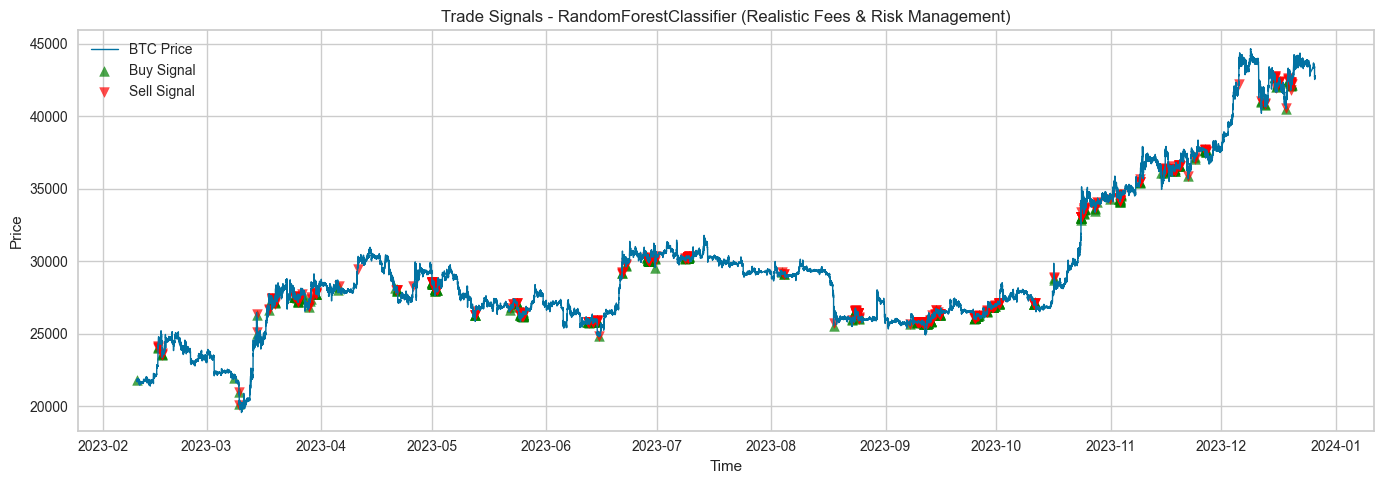

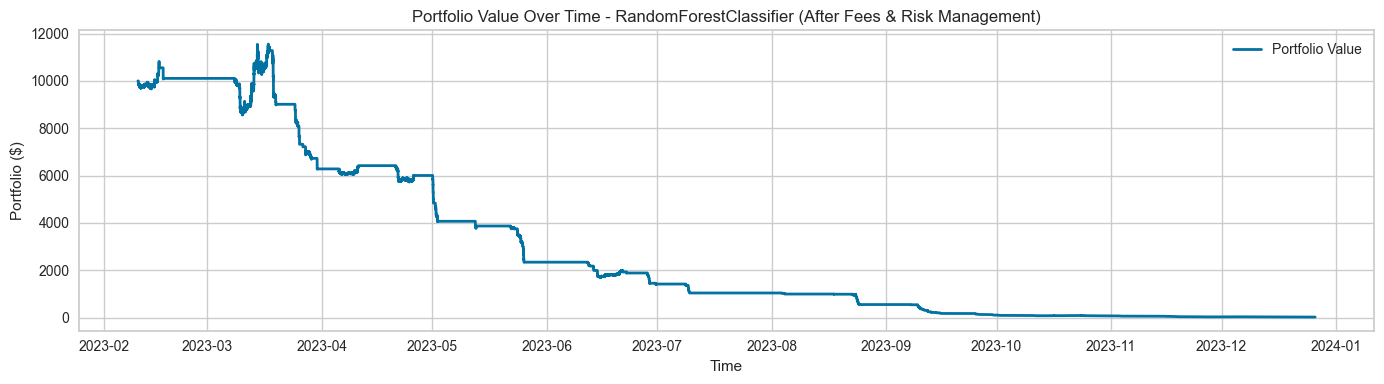


Backtesting model: ExtraTreesClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9993,1.0000,0.9985,0.9988,0.9986,0.9982,0.9982


Trade log saved: d:\Coding\Crypto_Research\models\code\trade_log_ExtraTreesClassifier.csv
Initial Capital      : $10,000.00
Final Portfolio Value: $23.30
Net Profit           : $-9,976.70
Total Return         : -99.77%
Sharpe Ratio         : -17.11
Max Drawdown         : 99.80%
Win Rate             : 2.51%
Total Trades         : 478
Avg Trade Return     : -1.24%
Total Fees Paid      : $14024.65
Fee Impact on Return : 140.25%


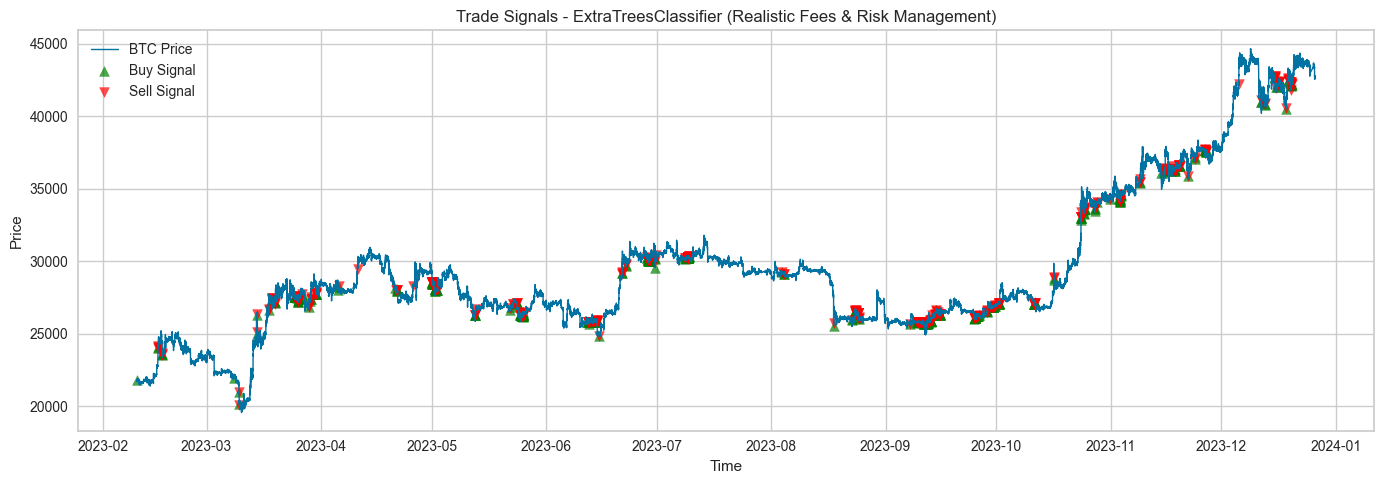

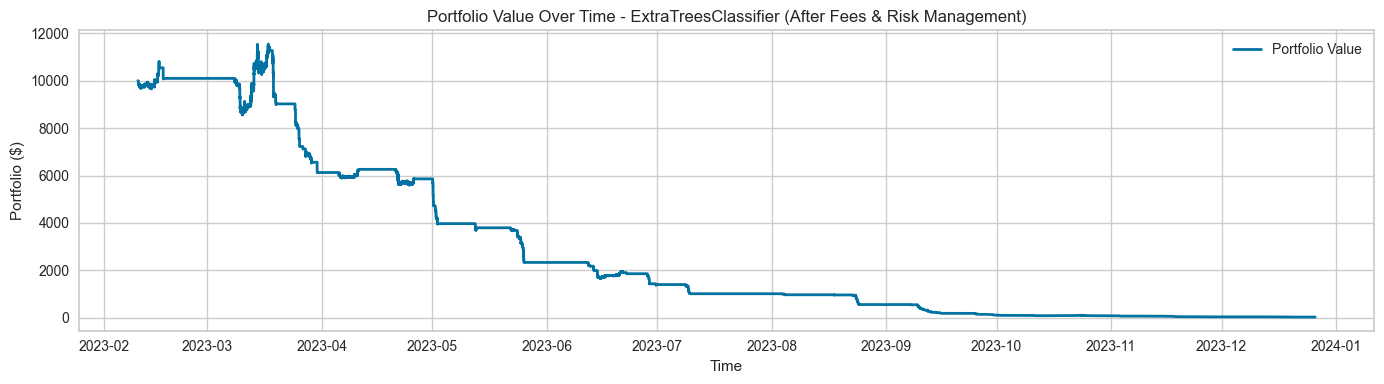


Backtesting model: DecisionTreeClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9990,0.9986,0.9979,0.9982,0.9980,0.9974,0.9974


Trade log saved: d:\Coding\Crypto_Research\models\code\trade_log_DecisionTreeClassifier.csv
Initial Capital      : $10,000.00
Final Portfolio Value: $3.63
Net Profit           : $-9,996.37
Total Return         : -99.96%
Sharpe Ratio         : -20.59
Max Drawdown         : 99.97%
Win Rate             : 2.33%
Total Trades         : 602
Avg Trade Return     : -1.29%
Total Fees Paid      : $13687.83
Fee Impact on Return : 136.88%


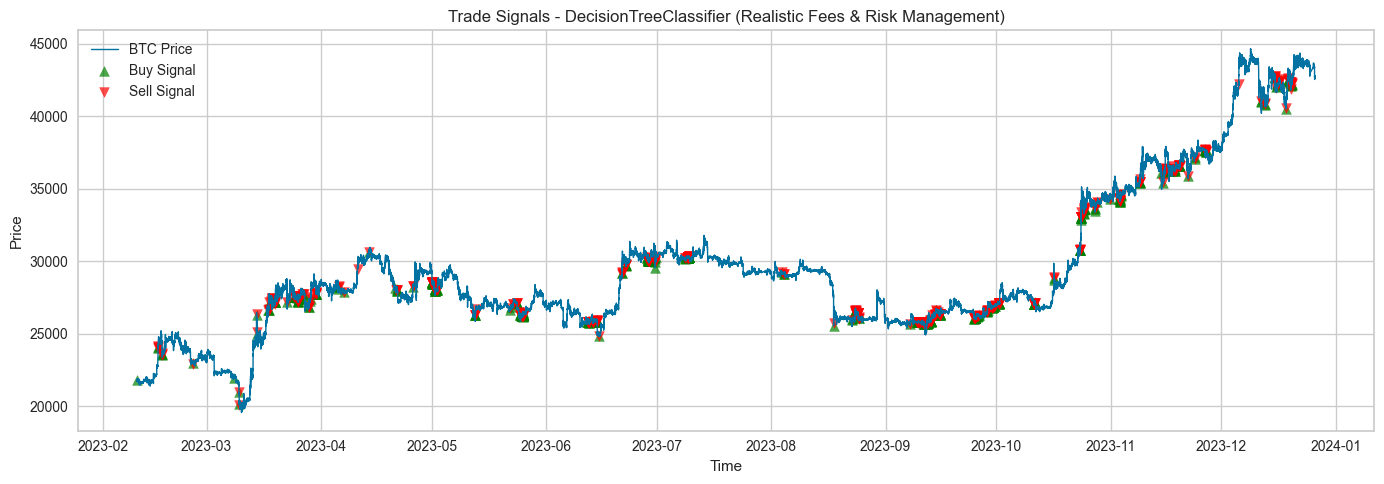

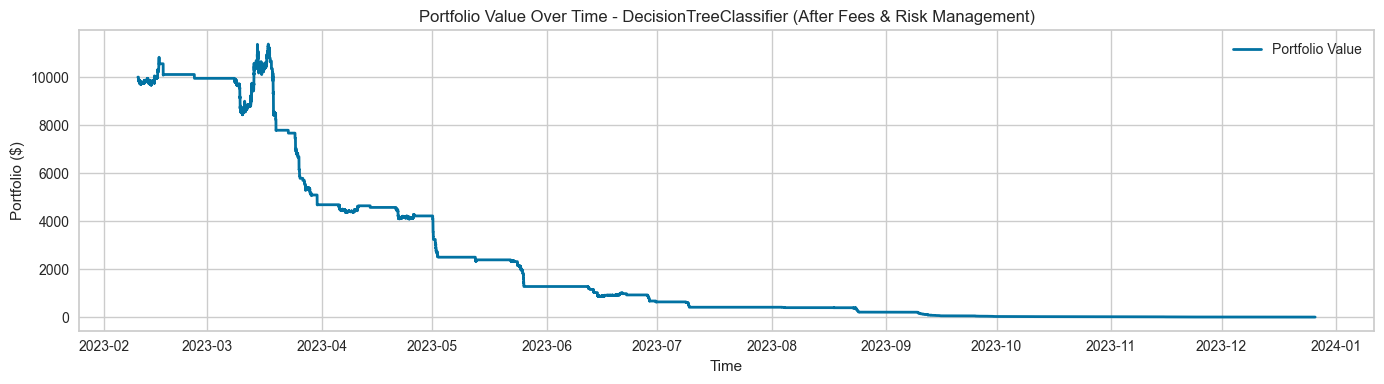


Backtesting model: KNeighborsClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9959,0.9996,0.9917,0.9923,0.9920,0.9893,0.9893


Trade log saved: d:\Coding\Crypto_Research\models\code\trade_log_KNeighborsClassifier.csv
Initial Capital      : $10,000.00
Final Portfolio Value: $0.89
Net Profit           : $-9,999.11
Total Return         : -99.99%
Sharpe Ratio         : -22.85
Max Drawdown         : 99.99%
Win Rate             : 1.42%
Total Trades         : 702
Avg Trade Return     : -1.31%
Total Fees Paid      : $13699.07
Fee Impact on Return : 136.99%


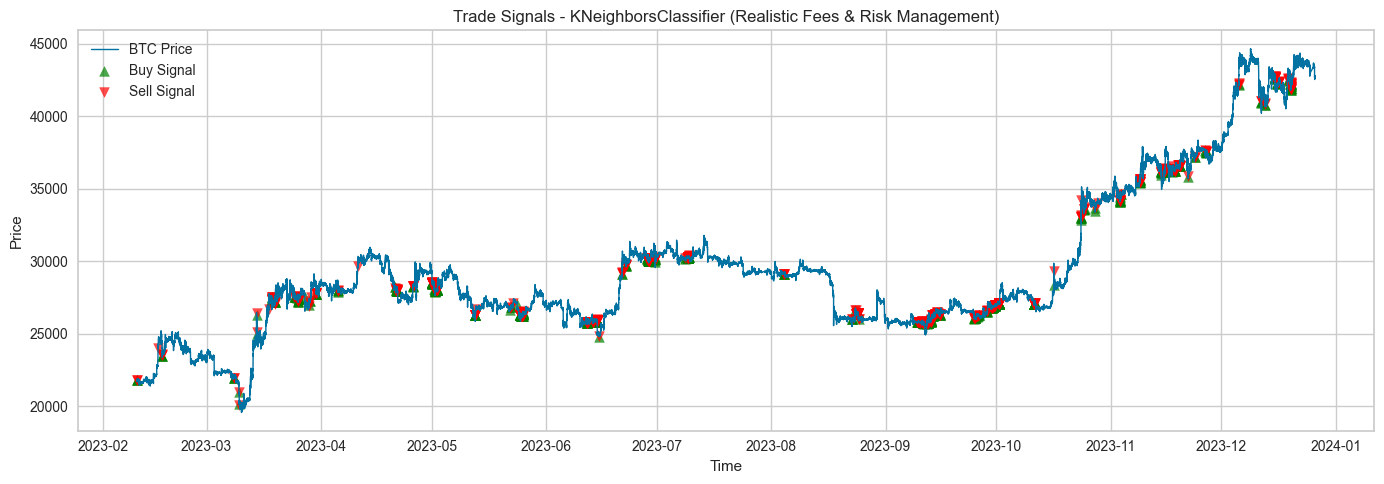

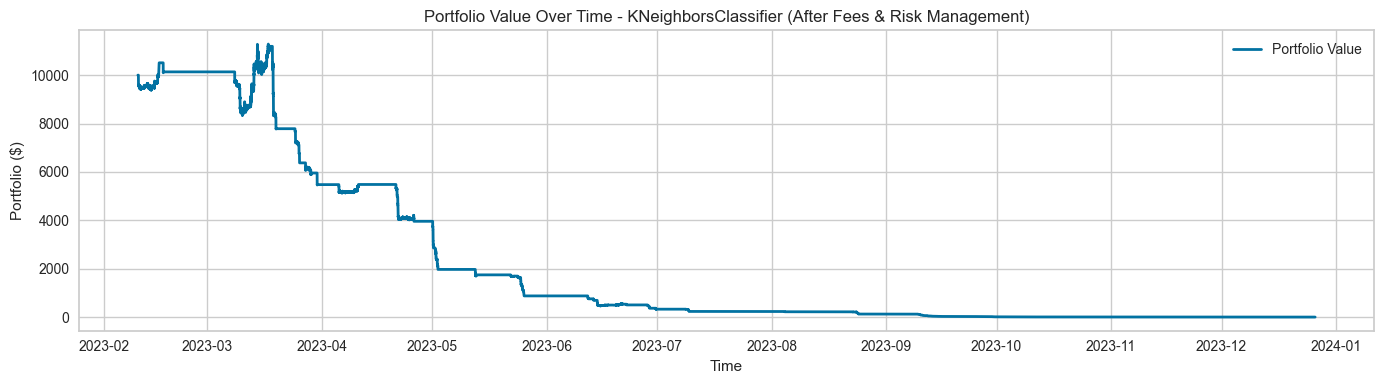


Backtesting model: LGBMClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9930,0.9996,0.9851,0.9873,0.9862,0.9815,0.9815


Trade log saved: d:\Coding\Crypto_Research\models\code\trade_log_LGBMClassifier.csv
Initial Capital      : $10,000.00
Final Portfolio Value: $477.85
Net Profit           : $-9,522.15
Total Return         : -95.22%
Sharpe Ratio         : -10.18
Max Drawdown         : 95.99%
Win Rate             : 3.70%
Total Trades         : 270
Avg Trade Return     : -1.08%
Total Fees Paid      : $13997.93
Fee Impact on Return : 139.98%


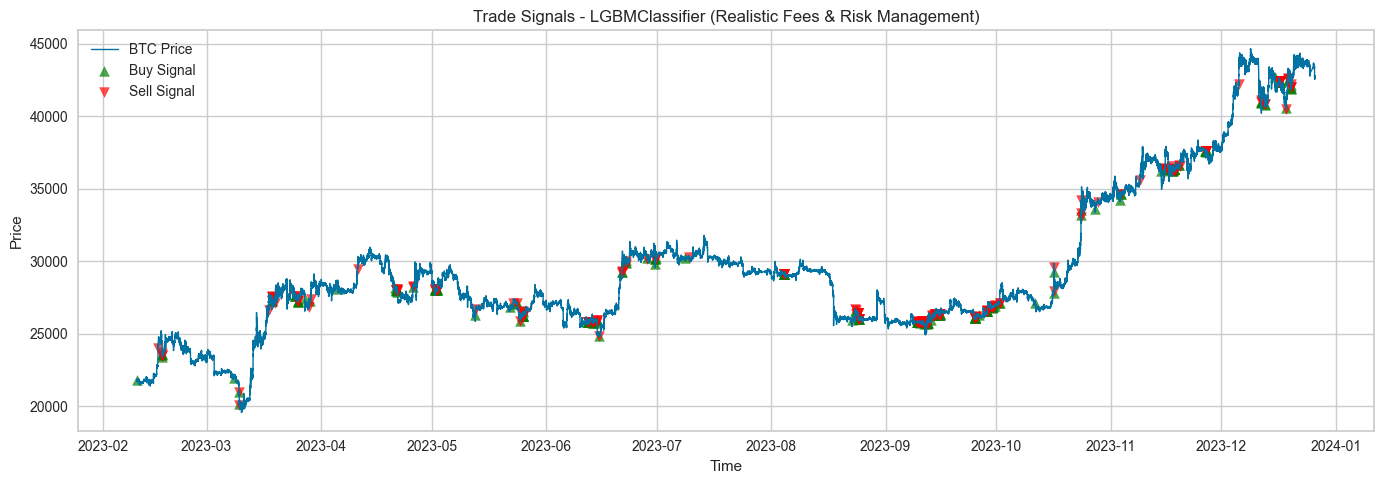

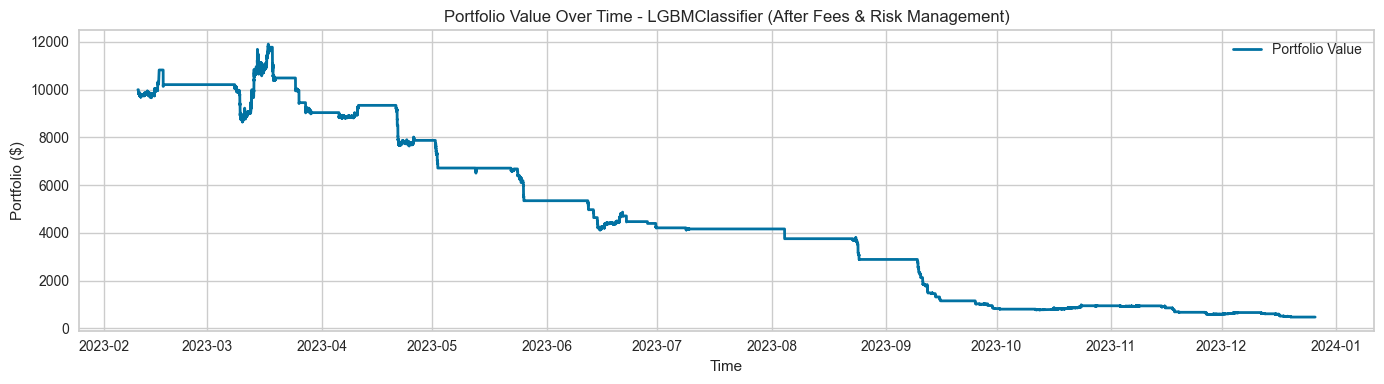

In [8]:
# backtesting with realistic fees, risk management, and proper trade logging
initial_capital = 10000
fee_pct = 0.0075  # 0.75% fee per trade
stop_loss_pct = 0.05  # 5% stop loss
strategy_results = {}

for model in top_models:
    model_name = model.__class__.__name__
    print(f'\nBacktesting model: {model_name}')

    # Predict on entire dataset (ensuring no look-ahead bias in model training)
    pred_df = predict_model(model, data=df.copy())
    pred_df['timestamp'] = pd.to_datetime(pred_df['Timestamp'])
    pred_df.set_index('timestamp', inplace=True)
    
    # Sort by timestamp to ensure proper chronological order
    pred_df = pred_df.sort_index()

    # Initialize variables
    position = 0
    cash = initial_capital
    trade_log = []
    portfolio_values = []
    in_trade = False
    entry_price = 0
    entry_time = None
    total_invested = 0
    entry_fees = 0

    for i in range(len(pred_df)):
        row = pred_df.iloc[i]
        signal = row['prediction_label']
        current_price = row['Close']
        date = row.name

        # Entry Logic: Buy signal
        if signal == 1 and not in_trade:
            # Implement realistic fee structure
            available_for_investment = cash
            gross_position_value = available_for_investment / (1 + fee_pct)
            position = gross_position_value / current_price
            entry_fees = gross_position_value * fee_pct
            total_invested = gross_position_value + entry_fees
            entry_price = current_price
            entry_time = date
            cash = 0
            in_trade = True

        # Exit Logic: Sell signal OR Stop-loss
        elif in_trade:
            current_value = position * current_price
            price_change = (current_value - total_invested) / total_invested
            
            # Check for stop-loss
            stop_loss_hit = price_change <= -stop_loss_pct
            sell_signal = signal == 0
            
            if sell_signal or stop_loss_hit:
                # Calculate exit with fees
                gross_exit_value = position * current_price
                exit_fees = gross_exit_value * fee_pct
                exit_cash = gross_exit_value - exit_fees
                
                # Calculate PnL properly
                pnl = exit_cash - total_invested
                return_pct = pnl / total_invested * 100
                
                # Log the trade
                trade_log.append({
                    'Entry Time': entry_time,
                    'Entry Price': round(entry_price, 2),
                    'Exit Time': date,
                    'Exit Price': round(current_price, 2),
                    'Investment ($)': round(total_invested, 2),
                    'Exit Value ($)': round(exit_cash, 2),
                    'Entry Fees ($)': round(entry_fees, 2),
                    'Exit Fees ($)': round(exit_fees, 2),
                    'PnL ($)': round(pnl, 2),
                    'Return (%)': round(return_pct, 2),
                    'Exit Type': 'Stop-Loss' if stop_loss_hit else 'Signal Exit'
                })
                
                cash = exit_cash
                position = 0
                in_trade = False
                total_invested = 0

        # Record realistic portfolio value
        if in_trade:
            current_gross_value = position * current_price
            estimated_exit_fees = current_gross_value * fee_pct
            portfolio_value = current_gross_value - estimated_exit_fees
        else:
            portfolio_value = cash
            
        portfolio_values.append({'timestamp': date, 'portfolio': portfolio_value})

    # Handle any remaining open position
    if in_trade:
        final_price = pred_df['Close'].iloc[-1]
        gross_exit_value = position * final_price
        exit_fees = gross_exit_value * fee_pct
        exit_cash = gross_exit_value - exit_fees
        pnl = exit_cash - total_invested
        return_pct = pnl / total_invested * 100
        
        trade_log.append({
            'Entry Time': entry_time,
            'Entry Price': round(entry_price, 2),
            'Exit Time': pred_df.index[-1],
            'Exit Price': round(final_price, 2),
            'Investment ($)': round(total_invested, 2),
            'Exit Value ($)': round(exit_cash, 2),
            'Entry Fees ($)': round(entry_fees, 2),
            'Exit Fees ($)': round(exit_fees, 2),
            'PnL ($)': round(pnl, 2),
            'Return (%)': round(return_pct, 2),
            'Exit Type': 'End of Period'
        })
        cash = exit_cash

    # Convert to DataFrames
    port_df = pd.DataFrame(portfolio_values).set_index('timestamp')
    trade_df = pd.DataFrame(trade_log)
    
    # Save trade log as CSV with cross-platform path
    csv_filename = os.path.join(os.getcwd(), f'trade_log_{model_name}.csv')
    trade_df.to_csv(csv_filename, index=False)
    print(f'Trade log saved: {csv_filename}')
    
    # Calculate realistic metrics
    final_value = cash
    net_profit = final_value - initial_capital
    total_return = (net_profit / initial_capital) * 100
    
    # Portfolio returns for Sharpe ratio
    returns = port_df['portfolio'].pct_change().dropna()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(365 * 24 * 60) if returns.std() != 0 else 0
    
    # Drawdown calculation
    peak = port_df['portfolio'].cummax()
    drawdown = (port_df['portfolio'] - peak) / peak
    max_drawdown = abs(drawdown.min()) * 100
    
    # Win rate and trade count
    if len(trade_df) > 0:
        win_rate = (trade_df['PnL ($)'] > 0).mean() * 100
        trade_count = len(trade_df)
        avg_trade_return = trade_df['Return (%)'].mean()
        total_fees_paid = trade_df['Entry Fees ($)'].sum() + trade_df['Exit Fees ($)'].sum()
    else:
        win_rate = 0
        trade_count = 0
        avg_trade_return = 0
        total_fees_paid = 0
            
    # Store results
    strategy_results[model_name] = {
        'portfolio': port_df,
        'trades': trade_df,
        'final_value': final_value,
        'return_%': total_return,
        'sharpe': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'trade_count': trade_count,
        'avg_trade_return': avg_trade_return,
        'total_fees': total_fees_paid
    }
    
    # Print realistic performance metrics
    print(f'Initial Capital      : ${initial_capital:,.2f}')
    print(f'Final Portfolio Value: ${final_value:,.2f}')
    print(f'Net Profit           : ${net_profit:,.2f}')
    print(f'Total Return         : {total_return:.2f}%')
    print(f'Sharpe Ratio         : {sharpe_ratio:.2f}')
    print(f'Max Drawdown         : {max_drawdown:.2f}%')
    print(f'Win Rate             : {win_rate:.2f}%')
    print(f'Total Trades         : {trade_count}')
    print(f'Avg Trade Return     : {avg_trade_return:.2f}%')
    print(f'Total Fees Paid      : ${total_fees_paid:.2f}')
    print(f'Fee Impact on Return : {(total_fees_paid/initial_capital)*100:.2f}%')

    # --- PLOT TRADE SIGNALS ---
    plt.figure(figsize=(14, 5))
    plt.plot(pred_df.index, pred_df['Close'], label='BTC Price', linewidth=1)

    if len(trade_df) > 0:
        # Plot entry and exit points
        entry_times = pd.to_datetime(trade_df['Entry Time'])
        exit_times = pd.to_datetime(trade_df['Exit Time'])
        entry_prices = trade_df['Entry Price']
        exit_prices = trade_df['Exit Price']
        
        plt.scatter(entry_times, entry_prices, marker='^', color='green', s=50, label='Buy Signal', alpha=0.7)
        plt.scatter(exit_times, exit_prices, marker='v', color='red', s=50, label='Sell Signal', alpha=0.7)

    plt.title(f'Trade Signals - {model_name} (Realistic Fees & Risk Management)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # --- PLOT PORTFOLIO VALUE ---
    plt.figure(figsize=(14, 4))
    plt.plot(port_df.index, port_df['portfolio'], linewidth=2, label='Portfolio Value')
    plt.title(f'Portfolio Value Over Time - {model_name} (After Fees & Risk Management)')
    plt.ylabel('Portfolio ($)')
    plt.xlabel('Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ML Models Performance Summary

## Executive Summary

This analysis evaluated 5 machine learning models for Bitcoin trading strategy on 2023 1-minute data. **All models failed catastrophically** despite high prediction accuracy (99.76%), losing 95-99% of capital due to excessive trading frequency and transaction costs.

## Model Performance Results

| Model | Accuracy | Final Value | Return | Win Rate | Trades | Avg Return/Trade | Total Fees | Sharpe |
|-------|----------|-------------|--------|----------|--------|------------------|------------|--------|
| **Random Forest** | 99.76% | $21.34 | -99.79% | 2.48% | 483 | -1.25% | $13,976 | -17.30 |
| **Extra Trees** | 99.76% | $23.30 | -99.77% | 2.51% | 478 | -1.24% | $14,025 | -17.11 |
| **Decision Tree** | 99.65% | $3.63 | -99.96% | 2.33% | 602 | -1.29% | $13,688 | -20.59 |
| **K-Neighbors** | 99.47% | $0.89 | -99.99% | 1.42% | 702 | -1.31% | $13,699 | -22.85 |
| **LightGBM** | 99.24% | $477.85 | -95.22% | 3.70% | 270 | -1.08% | $13,998 | -10.18 |

## Key Findings

### Critical Performance Issues

1. **Fee Death Spiral**: Transaction costs (0.75% per trade) consumed 136-140% of initial capital
2. **Ultra-High Frequency Trading**: Average 1.7 trades per day, most lasting <10 minutes
3. **Accuracy-Profitability Disconnect**: 99%+ accuracy yielded 97%+ loss rates
4. **Systematic Signal Failure**: 97.5% of exits triggered by model signals, not stop-losses

### Root Cause Analysis

- **Frequency-Cost Mismatch**: Models optimized for prediction accuracy, not trading profitability
- **Short Duration Bias**: 84% of trades lasted <1 hour, insufficient to overcome transaction costs
- **Market Microstructure Ignorance**: No consideration of bid-ask spreads, slippage, or market impact
- **Target Variable Flaw**: Binary classification on price direction without transaction cost awareness

## Strategic Implications

### What Doesn't Work
- Binary classification on raw price movements
- High-frequency signal generation without cost consideration
- Treating trading as pure prediction problem
- Ignoring market microstructure in model training

### Required Optimizations (Future Work)
1. **Transaction Cost-Aware Training**: Adjust target variables to account for fees
2. **Confidence-Based Filtering**: Use prediction probabilities instead of binary signals
3. **Dynamic Position Sizing**: Scale positions based on model confidence
4. **Minimum Holding Periods**: Filter out unprofitable short-duration signals
5. **Market Regime Awareness**: Adapt strategy to different market conditions

## Conclusion

Despite exceptional prediction accuracy, all ML models failed due to fundamental strategy design flaws. The core issue is treating trading as a pure prediction problem while ignoring transaction costs and market dynamics. 

**Next Steps**: Redesign strategy with transaction cost-aware training, probability-based entry/exit thresholds, and dynamic position sizing to bridge the gap between prediction accuracy and trading profitability.